# 1. Import required packages

In [31]:
#Import required packages:

#Numpy and Pandas
import numpy as np
import pandas as pd

# Datetime
from datetime import date
from datetime import datetime

#punctuation
#import string

#Importing re
import re

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Authenticate to Twitter and getting tweets

In [32]:
# Extracting twitter data:
#Query to extract twitter data

#query = "(#farmersprotest) lang:en until:2007-03-07 since:2019-01-01"
#tweets = []
#limit = 100


#for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    #if len(tweets) == limit:
     #   break
    #else:
        #tweets.append([tweet.date, tweet.user.username, tweet.content])
        
#df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
#print(df)

Notes: Twitter data was extracted with the hashtag #farmersprotest

In [33]:
#Merging all the files
file1 = pd.read_csv("tweets_FarmersProtest_Mar_17_Oct_17.csv")
file2 = pd.read_csv("tweets_SaveFarmers_Mar_17_Oct_17.csv")

frames = [file1,file2]
tweet_data_event2017 =pd.concat(frames)

print(tweet_data_event2017.shape)

(1829, 3)


In [34]:
tweet_data_event2017.head(2)

,Unnamed: 0,Date,Tweet
0,0,2017-10-22 21:23:04+00:00,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F..."
1,1,2017-10-22 21:20:42+00:00,"@HRajaBJP @drtamilisaibjp,TNHavingLotof Issues..."


In [35]:
tweet_data_event2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 92
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1829 non-null   int64 
 1   Date        1829 non-null   object
 2   Tweet       1829 non-null   object
dtypes: int64(1), object(2)
memory usage: 57.2+ KB


In [36]:
#Changing the Date variable to datetime
tweet_data_event2017['Date'] = pd.to_datetime(tweet_data_event2017['Date']).dt.date

In [37]:
#Changing the Date variable to datetime
tweet_data_event2017['Date'] = pd.to_datetime(tweet_data_event2017['Date'])

# 3. Data Cleaning

In [38]:
#Remove links
tweet_data_event2017["clean_text"] = tweet_data_event2017["Tweet"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
tweet_data_event2017.head(1)

,Unnamed: 0,Date,Tweet,clean_text
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...","@HRajaBJP, TNHavingLotof Issues *#Dengue *#Far..."


In [39]:
# Remove punctuations
tweet_data_event2017["clean_text"] = tweet_data_event2017["clean_text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...@#_*]", " ", s).split()))
tweet_data_event2017.head(1)

,Unnamed: 0,Date,Tweet,clean_text
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",HRajaBJP TNHavingLotof Issues Dengue FarmersPr...


In [40]:
# Remove numbers
tweet_data_event2017["clean_text"].replace('d+', '', regex=True, inplace=True)
tweet_data_event2017.head(1)

,Unnamed: 0,Date,Tweet,clean_text
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",HRajaBJP TNHavingLotof Issues Dengue FarmersPr...


In [41]:
# Remove emojis

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweet_data_event2017["clean_text"] = tweet_data_event2017["clean_text"].apply(lambda s: deEmojify(s))

tweet_data_event2017.head(1)

,Unnamed: 0,Date,Tweet,clean_text
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",HRajaBJP TNHavingLotof Issues Dengue FarmersPr...


In [42]:
# Remove stop words

stop = set(stopwords.words('english'))
#print(stop)

def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

tweet_data_event2017["clean_text"] = tweet_data_event2017["clean_text"].apply(lambda s: rem_en(s))
tweet_data_event2017.head(1)

,Unnamed: 0,Date,Tweet,clean_text
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",hrajabjp tnhavinglotof issues dengue farmerspr...


Note: The tweets are cleaned using pre-processing steps used in NLP. Now clean data is avaiable for further analysis of data

# 4. Sentiment Analysis:

In [43]:
#Updating sentiments for each tweets using SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

tweet_data_event2017["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweet_data_event2017["clean_text"]]
tweet_data_event2017["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweet_data_event2017["clean_text"]]
tweet_data_event2017["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweet_data_event2017["clean_text"]]
tweet_data_event2017['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in tweet_data_event2017["clean_text"]]

tweet_data_event2017.head(2)

,Unnamed: 0,Date,Tweet,clean_text,Positive,Negative,Neutral,Compound
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",hrajabjp tnhavinglotof issues dengue farmerspr...,0.106,0.0,0.894,0.0772
1,1,2017-10-22,"@HRajaBJP @drtamilisaibjp,TNHavingLotof Issues...",hrajabjp rtamilisaibjp tnhavinglotof issues de...,0.098,0.0,0.902,0.0772


In [44]:
#Calculating sentiment score:
score = tweet_data_event2017["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
tweet_data_event2017["Sentiment"] = sentiment
tweet_data_event2017.head(1)

,Unnamed: 0,Date,Tweet,clean_text,Positive,Negative,Neutral,Compound,Sentiment
0,0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",hrajabjp tnhavinglotof issues dengue farmerspr...,0.106,0.0,0.894,0.0772,Positive


Notes: Sentiment analysis is performed using the compund evaluation methog. Each tweet is assigned with its polarity value on how much positivity, negativity and neutrlity it contains. Finally sentiment is extracted depending on thier compound value.

In [45]:
#Importing the final dataset to a excel
tweet_data_event2017.to_csv(r'tweet_data_event2017.csv', index=False)

In [46]:
#load the data
tweet_data_2017 = pd.read_csv("tweet_data_event2017.csv", index_col=[0])
tweet_data_2017.head(2)

,Date,Tweet,clean_text,Positive,Negative,Neutral,Compound,Sentiment
Unnamed: 0,,,,,,,,
0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",hrajabjp tnhavinglotof issues dengue farmerspr...,0.106,0.0,0.894,0.0772,Positive
1,2017-10-22,"@HRajaBJP @drtamilisaibjp,TNHavingLotof Issues...",hrajabjp rtamilisaibjp tnhavinglotof issues de...,0.098,0.0,0.902,0.0772,Positive


In [47]:
#Removing http from the cleaned tweets
tweet_data_2017['clean_text'] = tweet_data_2017['clean_text'].str.replace('https', '')

# 5. Visualizations

#### Word cloud

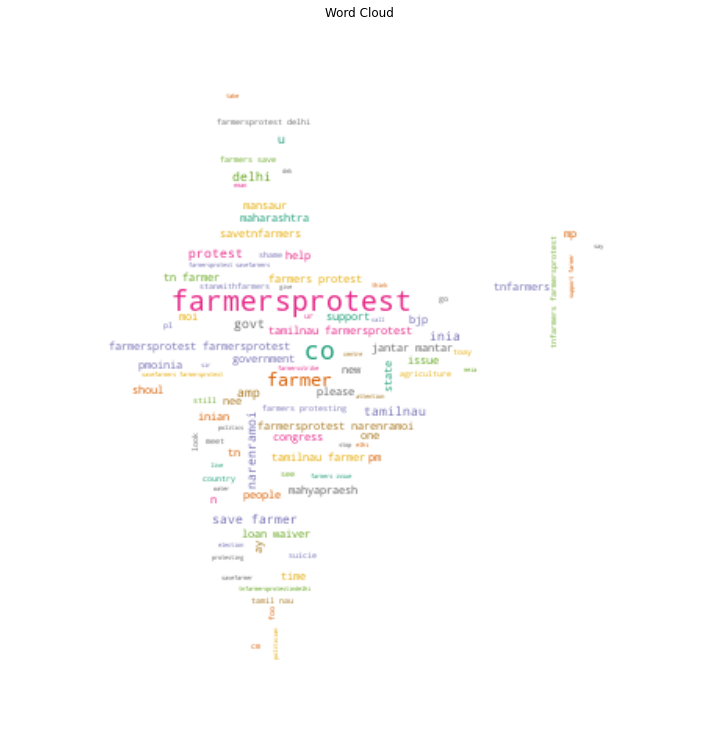

In [64]:
mask = np.array(Image.open("IndianMap.png"))

#Creating the text variable
cloud_text = " ".join(Tweet for Tweet in tweet_data_2017['clean_text'].astype(str))

def wordcloud(tweets, title):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("t")
    wordcloud = WordCloud(width=512, height=512, background_color="white", max_font_size=18, min_font_size=4,
                          max_words=200, stopwords=stopwords, colormap='Dark2',
                          random_state=2018, mask=mask).generate(cloud_text)
                            #random_state=2018, mask=mask).generate(" ".join(Tweet for Tweet in tweet_data_2017.clean_text))
    plt.figure(title, figsize=(15, 10), facecolor='white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.savefig('Indian_wordCloud.png')
    plt.show()
wordcloud(tweet_data_2017.clean_text, "Word Cloud")

Insights: This depicts the Indian map with word cloud with more than 200 words which evloved in tweeter during the protest

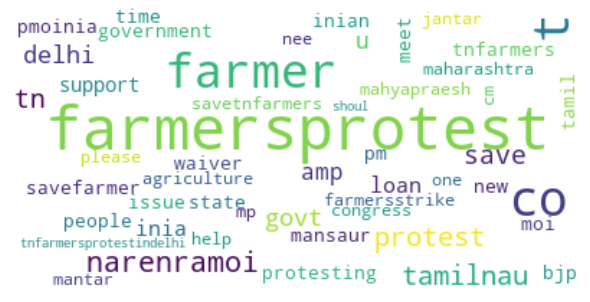

In [65]:
#Creating the text variable
cloud_text = " ".join(Tweet for Tweet in tweet_data_2017['clean_text'].astype(str))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(max_words=50, collocations = False, background_color = 'white').generate(cloud_text)

# Display the generated Word Cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordCloud2.png')
plt.show()

Insights: The above diagram shows the word cloud which displays the words which was frequently and mostly used during the campaign by the tweeters.

# 6. Trend analysis

In [50]:
#Drop the row which does not contains Date in Date variable
tweet_data_2017['Date'] = pd.to_datetime(tweet_data_2017['Date'],errors='coerce')
tweet_data_2017.dropna(inplace=True)

In [51]:
#Changing the data type for date from object to date type
tweet_data_2017['Date'] = pd.to_datetime(tweet_data_2017['Date'])

In [52]:
#Creating Date and assiciated variable for trend Analysis
tweet_data_2017['Date'] = pd.to_datetime(tweet_data_2017['Date'])
tweet_data_2017['year'] = tweet_data_2017['Date'].dt.year
tweet_data_2017['month'] = tweet_data_2017['Date'].dt.month
tweet_data_2017['day'] = tweet_data_2017['Date'].dt.day
tweet_data_2017['dayofweek'] = tweet_data_2017['Date'].dt.dayofweek
tweet_data_2017['dayofyear'] = tweet_data_2017['Date'].dt.dayofyear
tweet_data_2017['date_only'] = tweet_data_2017['Date'].dt.date
tweet_data_2017.head(1)

,Date,Tweet,clean_text,Positive,Negative,Neutral,Compound,Sentiment,year,month,day,dayofweek,dayofyear,date_only
Unnamed: 0,,,,,,,,,,,,,,
0,2017-10-22,"@HRajaBJP, TNHavingLotof Issues\n*#Dengue\n*#F...",hrajabjp tnhavinglotof issues dengue farmerspr...,0.106,0.0,0.894,0.0772,Positive,2017,10,22,6,295,2017-10-22


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


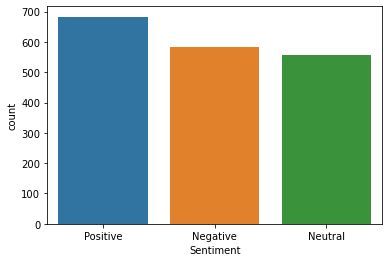

In [61]:
# Sentiment Counts
sns.countplot(tweet_data_2017.Sentiment)
plt.savefig('sentiment1.png')

Insights: It can be observed that about 90% of the tweets are positive which favours the support of indian farmers which helped to revoke the farm law even at the pre-digital sphere era

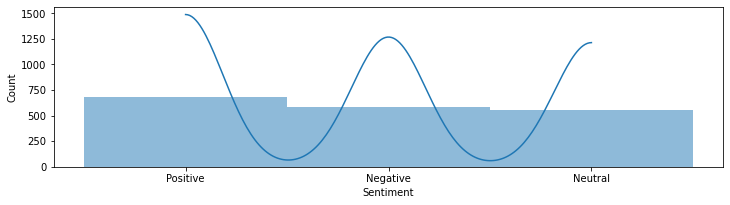

In [54]:
# Plot Distributions
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); 
sns.histplot(tweet_data_2017['Sentiment'], kde=True,  linewidth=0)# Plot distribution
plt.show()# Show the plot

##### Month Wise Analysis : 

In [55]:
#Create a new column with year and month for analysis
tweet_data_2017['yyyy-mm'] = pd.to_datetime(tweet_data_2017['date_only']).dt.strftime('%Y-%m')

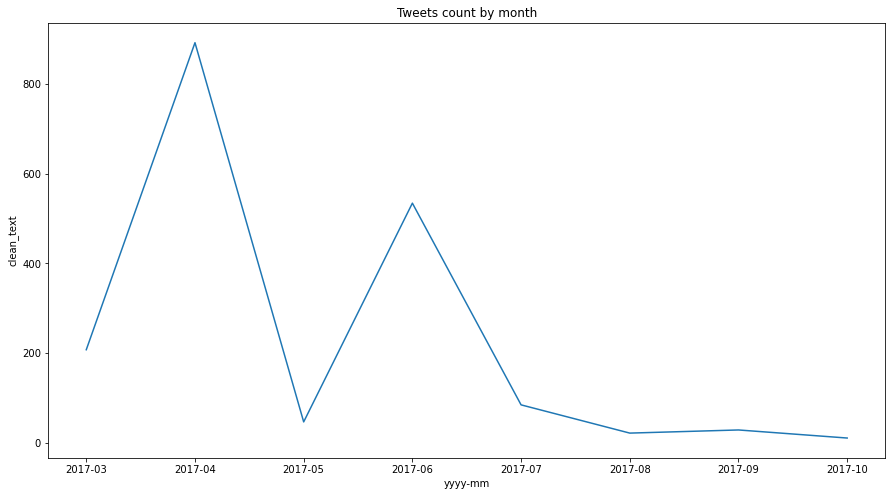

In [63]:
#Day of the week mostly tweeted
plt.figure(figsize = (15, 8))
tweets_month = tweet_data_2017.groupby(["yyyy-mm"])["clean_text"].count().reset_index()
tweets_month.columns = ['yyyy-mm', 'clean_text']
sns.lineplot(x = 'yyyy-mm', y = 'clean_text', hue = None, data = tweets_month)
plt.title('Tweets count by month')
plt.savefig('Trend.png')
plt.show()

Insights: This plot depicts the trend in the evolution of the tweets during the protest. The tweets seems to be hight at the start of the protest. However contributing to less tweets compared to farm law in 2021.

References:
    #https://medium.com/simplifying-data-science/word-cloud-generation-in-python-a01c5bd0a3db
    #https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
    #https://www.youtube.com/watch?v=uPKnSq6TaAk
    #https://www.kaggle.com/code/anmolkumar/coronavirus-covid-19-tweets-word-clouds/notebook
    #https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-text-pre-processing-with-python-example/